Welcome to the hands-on lab for **Evaluating Software Composition Analysis (SCA)**.

# Learning Objectives

After completing this lab, you will be able to:
* Download and install the **OWASP SCA Tool**
* Use the SCA tool to detect vulnerabilities in a project's components
* Output scan results to JSON and HTML formats
* Understand how to analyze the output of the tool
* Discover where the reports are stored

# What is Software Composition Analysis (SCA)?

* Modern applications may be developed using 3rd-party and open-source components. 
* Other people code these components. 
* **How do you know if the components are safe?**
* **How can you verify their security?** 
* You can do this by learning how to use software composition analysis tools to inspect the components used in your applications. 
* You can ensure your code is safe from any known component vulnerabilities.

# Software Composition Analysis (SCA)

Software Composition Analysis (SCA) is the process of identifying areas of risk that result from the use of third-party and open-source components during application development.

SCA tools can identify several risk factors, including:

* **Outdated components**
* **Components with known vulnerabilities**
* **Component quality**: From a security standpoint, a component might be considered lower quality if it is poorly maintained or has a very small community supporting it.
* **Transitive dependencies**:
    * SCA tools can track vulnerabilities from transitive dependencies.
    * When a component relies upon another component, that dependency is referred to as transitive.
* **External services**: A component may interact with external services, such as Web APIs. SCA tools can identify when this interaction might be a vulnerability.

**Dependency-Check** is a Software Composition Analysis (SCA) tool that attempts to detect publicly disclosed vulnerabilities contained within a project's dependencies. Dependencies are the software components that your code relies on for additional functionality. The SCA tool will generate a report listing the dependency, any identified Common Platform Enumeration (CPE) identifiers, and the associated Common Vulnerability and Exposure (CVE) entries.

In this hands-on lab, we will explore the use of the **OWASP SCA Dependency-checker** tool.

# Step 1: Installing the OWASP SCA Tool

You have a little preparation to do before you can start the hands-on lab.

## Your Task

Run the **`wget`** command to download and install the OWASP dependency-check script:

```
wget -O dependency-check.zip https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0267EN-SkillsNetwork/labs/module2/data/dependency-check.zip && unzip dependency-check.zip && chmod +x dependency-check/bin/dependency-check.sh && sudo echo "alias dependency-check=$(pwd)/dependency-check/bin/dependency-check.sh" >> ~/.bashrc && source ~/.bashrc
```

## Results

You should see an output similar to this:

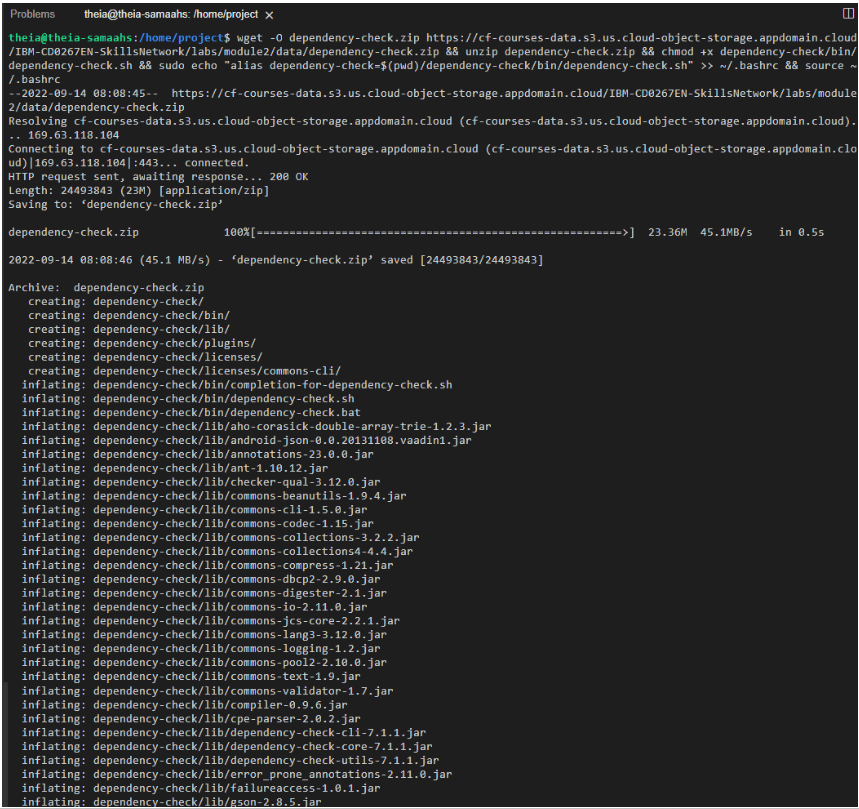

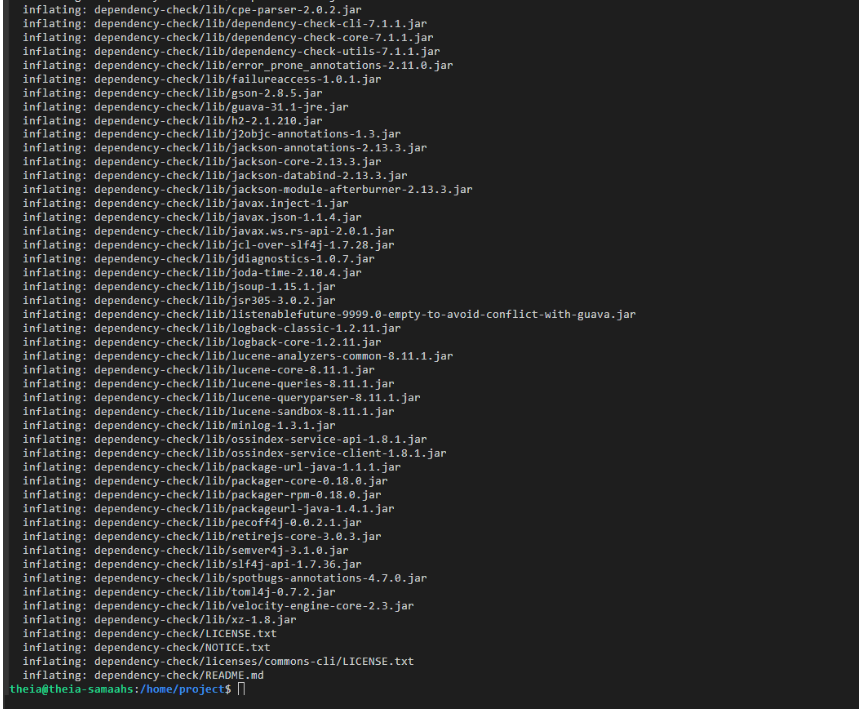

Now you'll be able to run the OWASP SCA tool using **`dependency-check`** on the command line.

# Step 2: Download the Source Code

Next, we'll need some source code to scan. We'll use a popular example of a vulnerable application called **OWASP Juice Shop**, explicitly created for security training purposes.

## Your Task

Run the following **`git clone`** command to download the source code:

```
git clone https://github.com/juice-shop/juice-shop.git
```

## Results

Your output should look something like this:

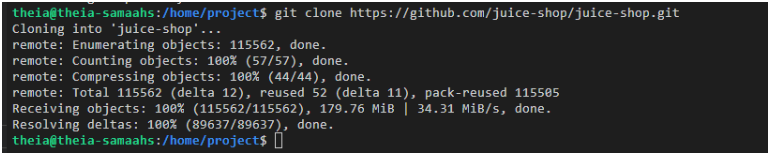

Execute the following command to remove the **'uploads'** folder and all its contents:

```
 rm -rf juice-shop/frontend/src/assets/public/images/uploads/
```

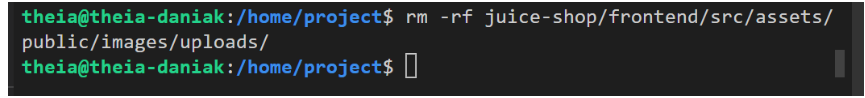

Now you're ready to analyze the **Juice Shop** application.

# Step 3: Run SCA on Juice Shop Components

The OWASP SCA tool can create a Hypertext Markup Language (HTML) report or JavaScript Object Notation (JSON) output. In this step, we'll run the tool and output the results to a JSON output.

## Your Task

Use the dependency-check command on the Juice Shop source code with the following options to produce a JSON output:

```
dependency-check -f JSON --prettyPrint --scan juice-shop
```

> *Note: This may take a while because the first time you run it, it must download all of the updates from the CVE database. Subsequent runs will complete more quickly.*

The command will produce a file called **`dependency-check-report.json`** which may contain information about any vulnerable components found by the OWASP SCA Tool.

## Scan Results

The results of the scan will look similar to this:

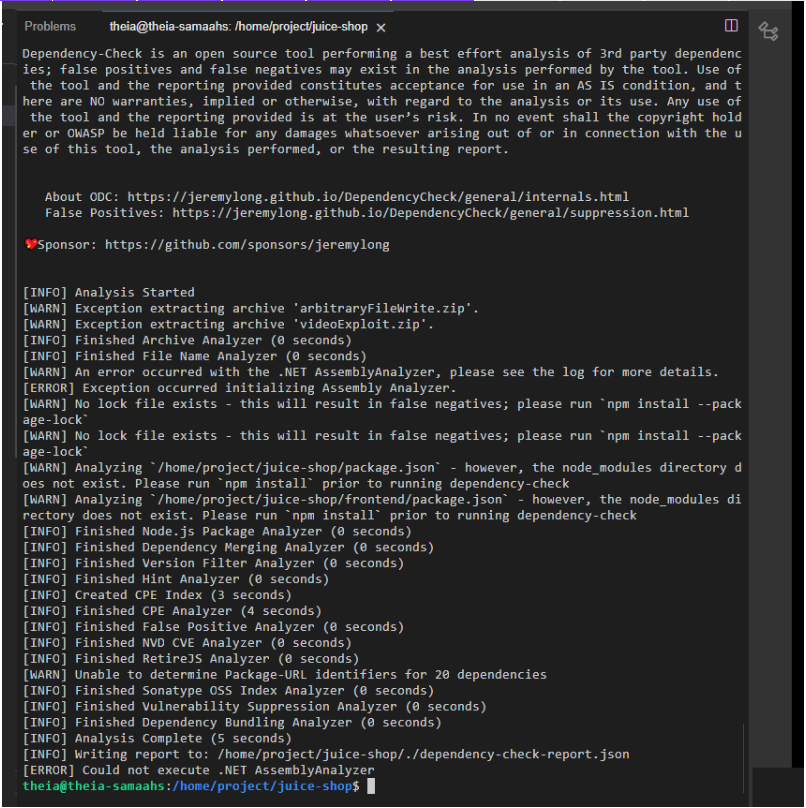

# Step 4: Analyzing JSON Results

When we ran the command in Step 3, the report **`dependency-check-report.json`** was saved in the **`/home/project`** folder. You can view the file by opening it manually or by pressing this button.



Since JSON can be challenging to read, you might want to modify the output to only display the name of the affected files.

To do this you can use the **`jq`** command and append the **`'.dependencies[].filePath'`** parameter to filter the JSON output to only display the path of the affected files.

## Your Task

Use the following **`jq`** command to list the software components that were found to be vulnerable by the OWASP tool:

```
jq '.dependencies[].filePath' dependency-check-report.json
```

> *Note: This search will return the **`filePath`** attribute of all of the items in the **`dependencies[]`** array in the file **`dependency-check-report.json`**.*

# Filter Output Results

The output should look like this:

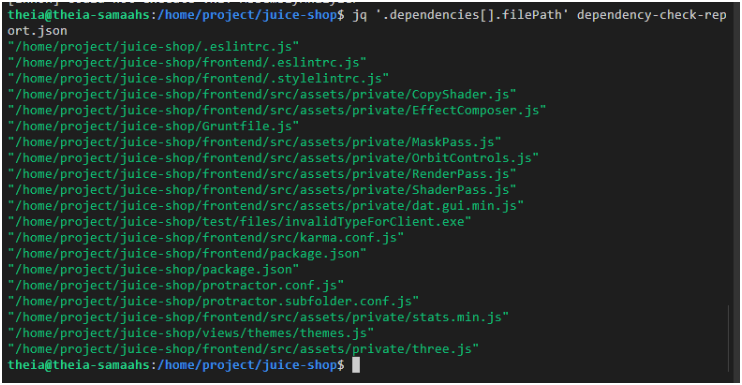

* In a secure Software Development Life Cycle (SDLC), each component should be thoroughly checked and verified for security.
* Any dependencies that might be vulnerable should be upgraded or replaced.

# Step 5: Creating an HTML report

Reports outputted to JSON format can be difficult to read. It may be preferable to send your scan output to an HTML report instead. HTML reports are easier for us to read and interpret.

## Your Task

Use the dependency-check command to create an HTML report from a --scan of the juice-shop folder:

```
dependency-check --scan juice-shop
```

Once the process has completed, a report called *`dependency-check-report.html`** will be located in your file explorer. Unfortunately, the Cloud IDE environment does not have a way to render this HTML file, so you must download the report and view it in your web browser.

Let's take a closer look at an example HTML report.

## Results

The **Project:** section of the report displays **Scan Information**. This section contains the version of the dependency checker used, the date and time that the report was run, some additional information about the number of dependencies scanned, and how many vulnerabilities were found.

The **Summary** section of the report displays dependencies by name, the Vulnerability ID, and the package name. It also shows the level of criticality for each vulnerability and other details associated with the **Juice Shop** project.

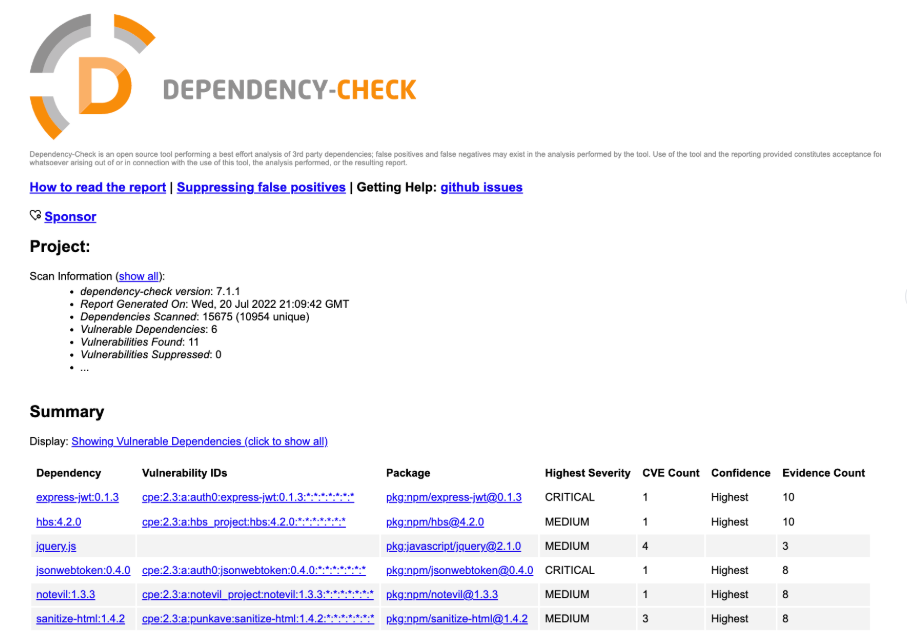

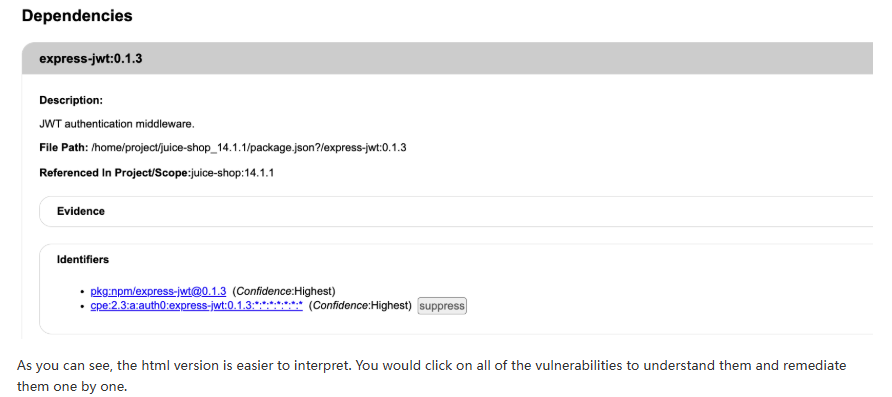

# Conclusion

Congratulations! You have learned how **Software Composition Analysis (SCA)** can help you detect known vulnerabilities in any dependencies your code is dependent on. This is an integral part of secure software application development.

In this lab, you have learned to download, install, and configure the **OWASP SCA Dependency-check Tool** to perform dependency analysis on components used in a software application. You learned how to output scan results to JSON and HTML formats and where the reports are stored. You familiarized yourself with the layout of the HTML report and learned how to analyze the results.

# Next Steps

Detecting different vulnerabilities is just one of the first steps in secure app development. It is helpful to understand the meaning behind those vulnerabilities to take corrective actions to mitigate them. There is no better way to learn than by doing.

Your next challenge is installing OWASP SCA **[Dependency-Check](https://github.com/jeremylong/DependencyCheck/releases)** in your development environment, performing dependency scans on your code, and fixing any problems it may find. You are well on your way to writing more secure code!